## SVM
### Theories
- Given linearly separable datapoints $[\mathbf{x}_1, \dots, \mathbf{x}_n] = \mathbf{X} \in \mathbb{R}^{d \times n}$ belonging to 2 classes, described by $[y_1, \dots, y_n] = \mathbf{y} \in \mathbb{R}^{1 \times n}, y_i \in \{1, -1\}$, find a hyperplane $w: \mathbf{w}^T\mathbf{x} + b = 0$ that separates these 2 classes (each half-space only contains datapoints from the same class).
- First of all, distance from a datapoint to a hyperplane is given by (solved with Lagrange multiplier): $$
  d(\mathbf{x}_0, w) = \frac{|\mathbf{w}^T\mathbf{x}_0+b|}{|\mathbf{w}|_2}
$$
- We can orient $w$ so it aligns with the labels. Then, the distance of each datapoint $\mathbf{x}_i$ to $w$ is given by: $$
  d(\mathbf{x}_i, w) = \frac{y_i\left(\mathbf{w}^T\mathbf{x}_0 + b\right)}{|\mathbf{w}|_2}
$$
- The best separation is that for the closest datapoints, also called support vectors, to $w$, we maximize this distance towards support vectors of both classes.
- Then $\mathbf{w}$ and $b$ can be scaled up by $k$ so that the closest points of each class to $w$ is exactly $1$, as we can always fit this hyperplane $w$ exactly in the middle of 2 classes: $$\begin{cases}
  y_s\left(\mathbf{w}^T\mathbf{x}_s + b\right) &= 1,\ \ (\text{s denotes support vectors})\\
  y_i\left(\mathbf{w}^T\mathbf{x}_i + b\right) &\geq 1, \ \ \forall{i}: 1 \leq i \leq n.
  \end{cases}$$
- The optimisation becomes a constraint optimization as follow: $$\begin{aligned}
  \mathbf{w}^*, b^* &= \underset{\mathbf{w}, b}{\text{argmax}}\ \frac{y_s\left(\mathbf{w}^T\mathbf{x}_s + b\right)}{|\mathbf{w}|_2}\\
    &= \underset{\mathbf{w}, b}{\text{argmax}}\ \frac{1}{|\mathbf{w}|_2}\\
    &= \underset{\mathbf{w},b}{\text{argmin}}\ \frac{1}{2}|\mathbf{w}|_2^2,\ \ \ \ s.t.\  1 - y_i(\mathbf{w}^T\mathbf{x}_i + b) \leq 0,\ \ \forall{i} \in [1,n]
\end{aligned}$$
- Classification for any datapoint $\mathbf{x}_0$ becomes: $$
  \hat{y}_0 = \text{sgn}\left(\mathbf{w}^T\mathbf{x}_0 + b\right)
$$
- We have Lagrange function (note here $\underline {\lambda}
 = [\lambda_1, \dots, \lambda_n]$): $$
  \mathcal{L} (\mathbf{w}, b, \underline {\lambda}) = \frac{1}{2}\ |\mathbf{w}|_2^2 + \sum_{i=1}^{n}\lambda_i\left(1 - y_i\left(\mathbf{w}^T\mathbf{x}_i + b\right)\right)
$$
- And Lagrange dual: $$
  g(\underline {\lambda}) = \text{inf}\ \mathcal{L}(\mathbf{w}, b, \underline {\lambda})
$$
- Equate the Lagrange's gradient to zero: $$
  \nabla \mathcal{L} = \mathbf{0} \iff \begin{cases}
    \mathbf{w} - \sum_{i=1}^{n}\lambda_iy_i\mathbf{x}_i &= 0 \iff \mathbf{w} = \sum_{i=1}^{n}\lambda_iy_i\mathbf{x}_i\\
    -\sum_{i=1}^n\lambda_iy_i &= 0\\
  \end{cases}
$$
- Substitute back into the Lagrange dual: $$\begin{aligned}
  g(\underline{\lambda}) = \sum_{i=1}^{n} \lambda_i - \frac{1}{2}\sum_{i=1,j=1}^{n}\lambda_i\lambda_jy_iy_j\mathbf{x}_i^T\mathbf{x}_j
\end{aligned}$$
- Define matrix $[y_1\mathbf{x}_1, \dots, y_n\mathbf{x}_n] = \mathbf{V} \in \mathbb{R}^{d \times n}$, $\mathbf{V}^T\mathbf{V}$ positive semidefinite, we can see Lagrange dual's concavity by bringing it to quadratic form: $$
  g(\underline{\lambda}) = -\frac{1}{2}\underline{\lambda}^T\mathbf{V}^T\mathbf{V}\underline{\lambda} + \mathbf{1}^T\underline{\lambda}
$$
- With concavity, we perform Slater's strong duality check: $$
  \exists{\mathbf{w}_0, b_0}: 1 - y_i\left(\mathbf{w}_0^T\mathbf{x}_i + b_0\right) \leq 0, \ \ \forall{i}
\iff 2 - y_i\left(2\mathbf{w}_0^T\mathbf{x}_i + 2b_0\right) \leq 0\\
\text{Choose} \begin{cases}
  \mathbf{w}_1 &= 2\mathbf{w}_0\\
  b_1 &= 2\mathbf{b}_0
\end{cases} \\
\Longrightarrow 1 - y_i\left(2\mathbf{w}_0^T\mathbf{x}_i + 2b_0\right) \leq -1 \Rightarrow 1 - y_i\left(\mathbf{w}_1^T\mathbf{x}_i + b_1\right) \leq -1 < 0
$$
- Condition for Slater's theorem satisfies, so strong duality holds. Proof for Slater's theorem [here](https://q2liu.wordpress.com/2015/01/27/strong-duality-and-slaters-theorem/) [1].
- Therefore, solutions to the primal problem also solves the dual problem, and satisfy the KKT conditions, which were found earlier when equate Lagrange's gradient to 0: $$
  \underline{\lambda}^* = \underset{\underline{\lambda}} {\text{argmax}}\  g(\underline{\lambda}), \ \ s.t. \begin{cases}
    \underline{\lambda} \succeq 0\\
    \sum_{i=1}^n\lambda_iy_i = 0
  \end{cases}\\
  \text{KKT & constraints}: \begin{cases}
    \mathbf{w} = \sum_{i=1}^{n}\lambda_iy_i\mathbf{x}_i\\
    \sum_{i=1}^n\lambda_iy_i = 0\\
    \lambda_i\left(1 - y_i\left(\mathbf{w}^T\mathbf{x}_i + b\right)\right) = 0 \ \ \forall{i}\\
    1 - y_i\left(\mathbf{w}^T\mathbf{x}_i + b\right) \leq 0 \ \ \forall{i} \ \ (\text{constraint})
  \end{cases}
$$
- The dual problem can be solved (for $\underline{\lambda}$) using the library `cvxopt` quadratic programming solver. At the same time, for the last 2 conditions: $$
  \forall{i} \begin{cases}
    \lambda_i = 0,\ \ \text{OR}\\
    1 - y_i\left(\mathbf{w}^T\mathbf{x}_i + b\right) = 0 \iff \mathbf{w}^T\mathbf{x}_i + b = y_i
  \end{cases}
$$
- The second case consists of the datapoints closest to the hyperplane, called support vectors. Set $\mathcal{S}$ holds the indexes for these support vectors. In practice, we estimates $\mathbf{w}$ and $b$ using the numerically stable method, which averages all support vectors: $$\begin{cases}
  \mathbf{w}^T\mathbf{x}_i + b = y_i, \ \ \forall{i \in \mathcal{S}}\\
  \mathbf{w} = \sum_{j \in \mathcal{S}}\lambda_jy_j\mathbf{x}_j\\
  b = \frac{1}{n_{\mathcal{S}}}\sum_{i \in \mathcal{S}} (y_i - \mathbf{w}^T\mathbf{x}_i) = \frac{1}{n_{\mathcal{S}}}\sum_{i \in \mathcal{S}} \left(y_i - \left(\sum_{j \in \mathcal{S}}\lambda_jy_j\mathbf{x}_j\right)^T\mathbf{x}_i\right)
\end{cases}$$
- To classify $\mathbf{x}_0$, we take the sign of $\mathbf{w}^T\mathbf{x}_0 + b$: $$
  \text{sgn} \leftarrow \mathbf{w}^T\mathbf{x}_0 + b = \left(\sum_{j \in \mathcal{S}}\lambda_jy_j\mathbf{x}_j\right)^T\mathbf{x}_0 + \frac{1}{n_{\mathcal{S}}}\sum_{i \in \mathcal{S}} \left(y_i - \left(\sum_{j \in \mathcal{S}}\lambda_jy_j\mathbf{x}_j\right)^T\mathbf{x}_i\right)
$$

### Demo

lambda = 
[[4.38871724e-01 2.60960914e-09 3.55830577e-09 2.95266255e-08
  1.96293521e-09 1.29054967e-09 1.75813965e-09 1.69367179e-09
  2.31781100e-09 8.82317275e-09 1.98258567e-09 2.39857333e-09
  7.00012870e-09 2.94675849e-01 1.82688266e-09 1.44195902e-01
  2.17030454e-09 2.11545998e-09 5.36879957e-09 4.23183661e-09]]
line =
-0.44388283114137905 -0.8250524615249171 3.349678471459754


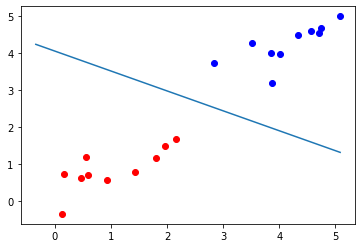

In [49]:
import numpy as np
from classifier.SVM import SVM

import matplotlib.pyplot as plt

means = [[1, 1], [4, 4]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
#X1[-1, :] = [2.7, 2]

svm = SVM(X0, X1).fit()

w, b = svm.get_hyperplane()
print('line =')
print(w[0][0], w[1][0], b)

# plot
plt.scatter(x=X0[:, 0], y=X0[:, 1], color='red')
plt.scatter(x=X1[:, 0], y=X1[:, 1], color='blue')

xx = np.linspace(np.min(X0), np.max(X1), 8)
yy = (-b - w[0][0]*xx) / w[1][0]

plt.plot(xx, yy)

## Soft-margin SVM
- Similar to SVM problem however datapoints no longer linearly separable. We still set-up the hyperplane the similar way, but introduces slack variables $\xi_i$ for each datapoint $\mathbf{x}_i$ to explain classification error: that is how much the datapoint enters the $-1, 1$ margins on both side of the support vector hyperplane.
- $\xi_i < 1$ means $\mathbf{x}_i$ enters the margins region but still correctly classified, $\xi_i > 1$ means it crosses over the hyperplane to the other side, and mis-classified. Equality occurs when it happens to be on the hyperplane. For datapoints correctly classified, outside of margins, $\xi_i = 0$, for datapoints inside the margins region and/or mis-classified: $$
  \xi_i = |{\mathbf{w}^T\mathbf{x}_i + b - y_i}|
$$
- The constraint becomes: $$
  y_i\left(\mathbf{w}^T\mathbf{x}_i + b\right) \geq 1 - \xi_i
$$
- With preset variables $C$ signifies how much error is allowed over the entire dataset, the optimization becomes: $$
  \mathbf{w}^*,\ b^*,\ \underline{\xi}^* = \underset{\mathbf{w},\ b,\ \underline{\xi}}{\text{argmin}}\ \frac{1}{2}|\mathbf{w}|_2^2 + C\sum_{i=1}^n \xi_i\ , \ \ s.t.\ \begin{cases}
    1 - \xi_i - y_i\left(\mathbf{w}^T\mathbf{x}_i + b\right) \leq 0 \ \ \forall{i}\\
    -\xi_i \leq 0 \ \ \forall{i}
  \end{cases}
$$
- Notice how if $C$ is chosen to be infinitely small, the svm becomes closer to hard-margin SVM.
- Convexity satisfies similarly to hard-margin SVM. Slater's condition for strong duality checks out since we can always select $\xi_i$ large enough for hard constraint.
- Lagrange function: $$
  \mathcal{L}(\mathbf{w}, b, \underline{\xi}, \underline{\lambda}, \underline{\nu}) = \frac{1}{2}|\mathbf{w}|_2^2 + C\sum_{i=1}^n \xi_i + \sum_{i=1}^n \lambda_i\left(1 - \xi_i - y_i\left(\mathbf{w}^T\mathbf{x}_i + b\right)\right) + \sum_{i=1}^{n} \nu_i\xi_i\ ,\ \ \text{with}\  \underline{\lambda} \succeq 0,\ \underline{\nu} \succ 0
$$
- Lagrange dual: $$
  g(\underline{\lambda}, \underline{\nu}) = \text{inf}\ \mathcal{L}(\mathbf{w}, b, \underline{\xi}, \underline{\lambda}, \underline{\nu})
$$
- Equate the Lagrange's gradient to 0: $$
  \nabla \mathcal{L} = \mathbf{0} \iff \begin{cases}
    \mathbf{w} &= \sum_{i=1}^n \lambda_iy_i\mathbf{x}_i\\
    \sum_{i=1}^n \lambda_iy_i &= 0\\
    \lambda_i &= C - \nu_i \Rightarrow 0 \leq \lambda_i \leq C
  \end{cases}
$$
- Substitute back to the Lagrange's dual, $g$ becomes independent of $\underline{\nu}$: $$
  g(\underline{\lambda}, \underline{\nu}) = \sum_{i=1}^n \lambda_i - \frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n \lambda_i\lambda_jy_iy_j\mathbf{x}_i^T\mathbf{x}_j
$$
- Solution to the primal also solves the dual: $$
  \underline{\lambda}^* = \underset{\underline{\lambda}}{\text{argmax}}\ g(\underline{\lambda})\ , \ \ s.t. \begin{cases}
    \sum_{i=1}^n \lambda_iy_i = 0\\
    0 \leq \lambda_i \leq C
  \end{cases}
$$
- Which also satisfies the KKT conditions: $$ \forall{i}: 1 \leq i \leq n: \begin{cases}
  1 - \xi_i - y_i\left(\mathbf{w}^T\mathbf{x}_i + b\right) \leq 0\\
  -\xi_i \leq 0,\ \nu_i \geq 0,\ \lambda_i \geq 0\\
  \nu_i\xi_i = 0\\
  \mathbf{w} = \sum \lambda_iy_i\mathbf{w}_i\\
  \sum \lambda_iy_i = 0\\
  \lambda_i = C - \nu_i
\end{cases} \Longrightarrow \begin{cases}
  \lambda_i = 0 \iff \nu_i = C \neq 0,\ \xi_i = 0, \ \ \text{safe region}\\
  \lambda_i > 0 \iff y_i\left(\mathbf{w}^T\mathbf{x}_i + b\right) = 1 - \xi_i \ \ \text{margins region and/or mis-classified}:\\
  \ \ \ \  * 0 < \lambda_i < C \Rightarrow \nu_i \neq 0,\ \xi_i = 0 \Rightarrow y_i\left(\mathbf{w}^T\mathbf{x}_i + b\right) = 1 \ \ \text{lies on support vector hyperplane}\\
  \ \ \ \  * \lambda_i = C \Rightarrow \nu_i = 0,\ \text{either}:\ \xi_i \leq 1 \iff \text{correctly classified},\ \xi_i > 1 \iff \text{mis-classified}
\end{cases}
$$
- Using `cvxopt` quadratic programming to solve for $\underline{\lambda}$, we finds the 2 sets that make up the support vectors: $$ \begin{cases}
  \mathcal{M} = {i: 0 < \lambda_i < C} \ \ n_{\mathcal{M}}\ \text{support vectors lying on hyperplane}\\
  \mathcal{S} = {j: 0 < \lambda_i \leq C} \ \ n_{\mathcal{S}}\ \text{all support vectors}
\end{cases} $$
- Calculations for $\mathbf{w},\ b$ are done by averaging the support vectors, similar to SVM: $$\begin{cases}
  \mathbf{w} &= \sum_{j \in \mathcal{S}} \lambda_jy_j\mathbf{x}_j\\
  b &= \frac{1}{n_{\mathcal{M}}} \sum_{i \in \mathcal{M}} \left(y_i - \mathbf{w}^T\mathbf{x}_i\right) = \frac{1}{n_{\mathcal{M}}} \sum_{i \in \mathcal{M}} \left(y_i - \left(\sum_{j \in \mathcal{S}} \lambda_jy_j\mathbf{x}_j\right)^T\mathbf{x}_i\right)
\end{cases}$$
- Classification for $\mathbf{x}_0$: $$
  \text{sgn} \leftarrow \mathbf{w}^T\mathbf{x}_0 + b = \left(\sum_{j \in \mathcal{S}} \lambda_jy_j\mathbf{x}_j\right)^T\mathbf{x}_0 + \frac{1}{n_{\mathcal{M}}} \sum_{i \in \mathcal{M}} \left(y_i - \left(\sum_{j \in \mathcal{S}} \lambda_jy_j\mathbf{x}_j\right)^T\mathbf{x}_i\right)
$$

[[-6.07493626]
 [ 3.6070513 ]] 7.3710411677560534
iter 1 cost: 24.094132
iter 10001 cost: 4.521741
iter 20001 cost: 4.129085
iter 30001 cost: 4.053931
iter 40001 cost: 3.998314
iter 50001 cost: 3.998131
iter 60001 cost: 3.998149
iter 70001 cost: 4.005141
iter 80001 cost: 3.999070
iter 90001 cost: 3.998382
[[-6.08166089]
 [ 3.60798415]] [7.38269917]


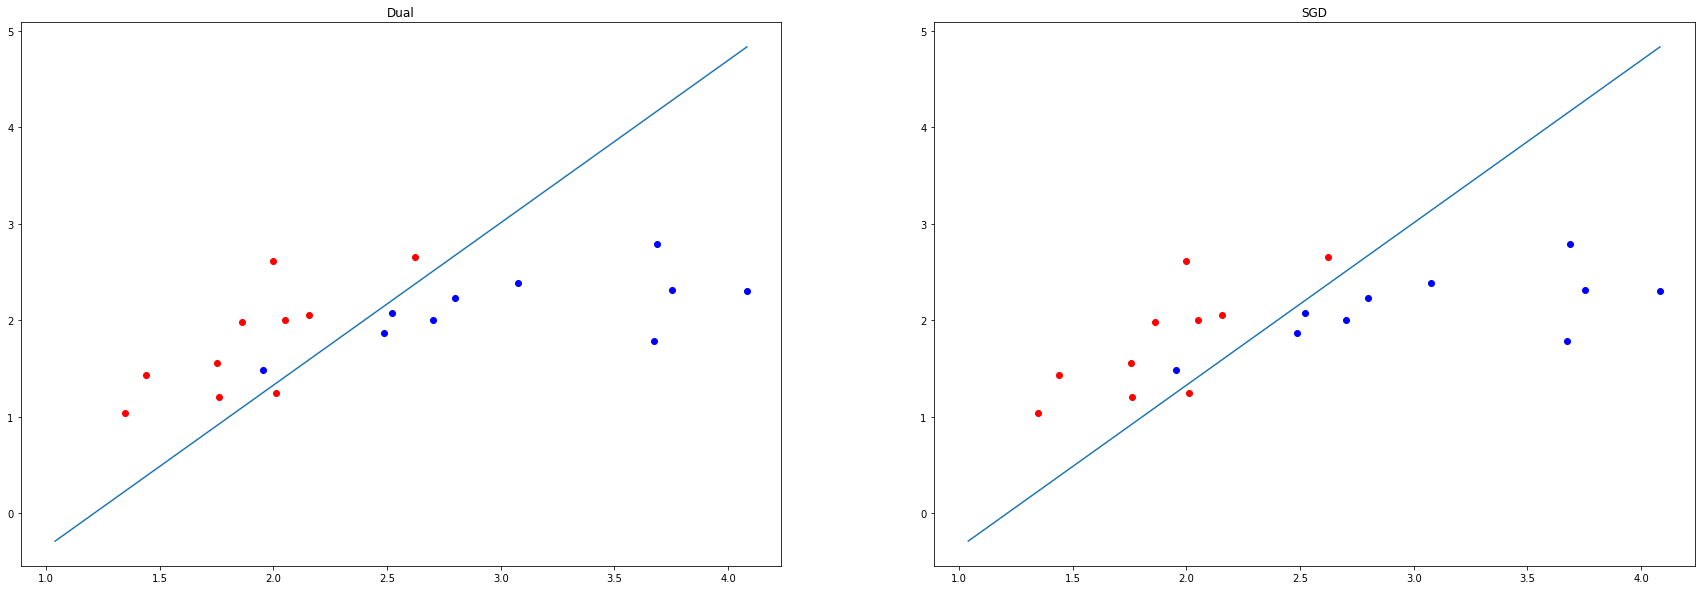

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

from classifier.SoftMarginSVM import SoftMarginSVM

np.random.seed(21)

means = [[2, 2], [3, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X1[-1, :] = [2.7, 2]
C = 100


svm = SoftMarginSVM(N, C, X0, X1)
xx = np.linspace(np.min(X0), np.max(X1), 8)
fig, axs = plt.subplots(1, 2, figsize=((30, 10)))

svm.duality_solve()
w, b = svm.get_hyperplane()
print(w, b)

axs[0].set(title="Dual")
axs[0].scatter(x=X0[:, 0], y=X0[:, 1], color='red')
axs[0].scatter(x=X1[:, 0], y=X1[:, 1], color='blue')

yy = (-b - w[0][0]*xx) / w[1][0]

axs[0].plot(xx, yy)
# == #

svm.sgd_solve()
w, b = svm.get_hyperplane()
print(w, b)

axs[1].set(title="SGD")
axs[1].scatter(x=X0[:, 0], y=X0[:, 1], color='red')
axs[1].scatter(x=X1[:, 0], y=X1[:, 1], color='blue')

yy = (-b - w[0][0]*xx) / w[1][0]

axs[1].plot(xx, yy)

# References
- [1] https://q2liu.wordpress.com/2015/01/27/strong-duality-and-slaters-theorem/